# Data Pre-processing

## 1. Plotting the original data

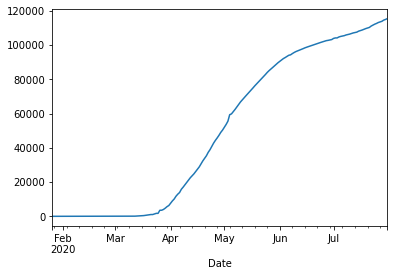

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

series = pd.read_csv('Canada.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series.columns = series.columns.str.replace(' ', '_')
series = series.iloc[:, 1]
series.plot()
plt.show()

## 2. Normalizing the data

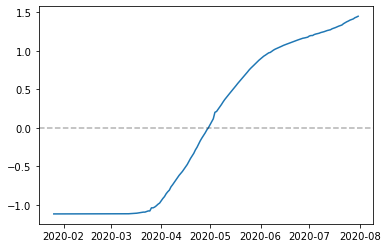

In [2]:
avg, dev = series.mean(), series.std()
series = (series - avg) / dev
plt.plot(series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

## 3. Keeping Standard Deviation Constant

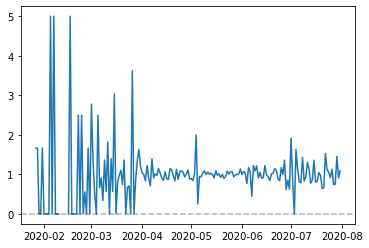

In [3]:
series = series.diff().dropna()
mean_array = np.array([])
for i in range(0, len(series), 5):
    mean_array = np.append(mean_array, series[i:i+5].mean())
mean_array = np.repeat(mean_array, 5)
if(len(mean_array) > len(series)):
    mean_array = mean_array[:len(series)]
series = series / mean_array
plt.plot(series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)